In [1]:
! pip3 install imutils

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import imutils

In [3]:
x = np.uint8([250])
y = np.uint8([10])
print( cv.add(x,y) )
print(x + y)

[[255]]
[4]


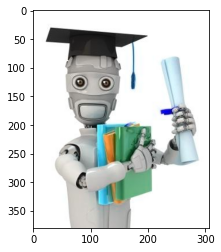

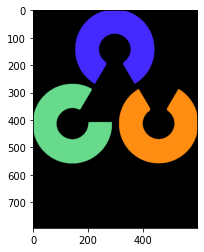

In [5]:
img1 = imutils.url_to_image('https://raw.githubusercontent.com/opencv/opencv/master/samples/data/ml.png')
img2 = imutils.url_to_image('https://raw.githubusercontent.com/opencv/opencv/master/samples/data/opencv-logo.png')
plt.figure()
plt.imshow(img1)
plt.figure()
plt.imshow(img2)
plt.show()

(380, 308, 3)
(794, 600, 3)
(794, 600, 3)


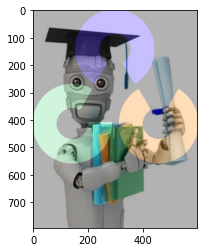

In [17]:
print(img1.shape)
print(img2.shape)
height, width = img2[:2]
img1_res = cv.resize(img1,(600,794), interpolation = cv.INTER_CUBIC)
print(img1_res.shape)
dst = cv.addWeighted(img1_res,0.7,img2,0.3,0)
plt.imshow(dst)
plt.show()

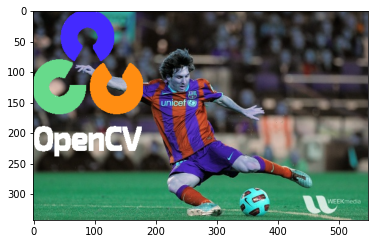

In [19]:
img1 = imutils.url_to_image('https://raw.githubusercontent.com/opencv/opencv/master/samples/data/messi5.jpg')
img2 =  imutils.url_to_image('https://raw.githubusercontent.com/opencv/opencv/master/samples/data/opencv-logo-white.png')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]
# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)
# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

plt.imshow(img1)
plt.show()